In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# - Separate images in train and test into two groups as DR and nonDR:
# o NonDR : Label 0
# o DR : Label 3 & Label 4 (You don’t need to use Label 1 and Label 2)

image_files = [f for f in os.listdir("Test") if os.path.isfile(os.path.join("Test", f))]

testnonDR = []
testDR = []

for image in image_files:
  label = image.split("-")[1].split('.')[0]
  # nonDR
  if (label == "0"):
    testnonDR.append(os.path.join("Test",image))
  elif (label == "3" or label == "4"):
    testDR.append(os.path.join("Test",image))

testnonDR = np.array(testnonDR)
testDR = np.array(testDR)

image_files = [f for f in os.listdir("Train") if os.path.isfile(os.path.join("Train", f))]

trainnonDR = []
trainDR = []

for image in image_files:
  label = image.split("-")[1].split('.')[0]
  # nonDR
  if (label == "0"):
    trainnonDR.append(os.path.join("Train",image))
  elif (label == "3" or label == "4"):
    trainDR.append(os.path.join("Train",image))

trainnonDR = np.array(trainnonDR)
trainDR = np.array(trainDR)

## Montage Train DR

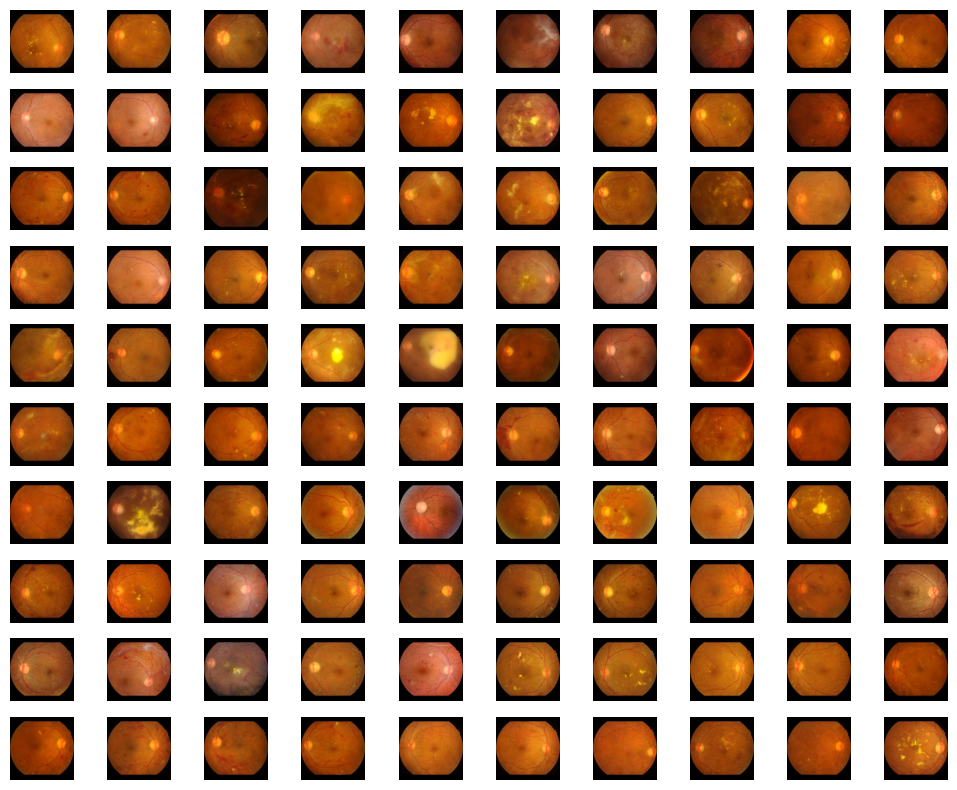

In [62]:
fig, axes = plt.subplots(10, 10, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(trainDR[i]), cmap='gray')
  ax.axis('off')
  
plt.tight_layout()
plt.show()

## Montage Train non DR

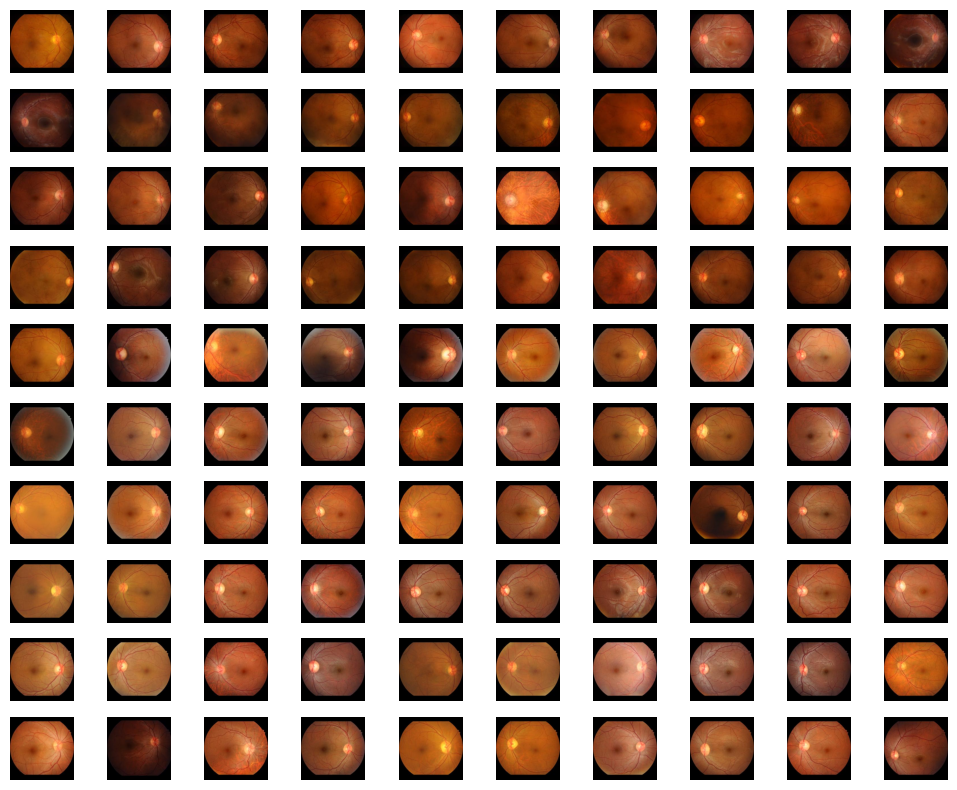

In [64]:
fig, axes = plt.subplots(10, 10, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(trainnonDR[i]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Montage Test DR

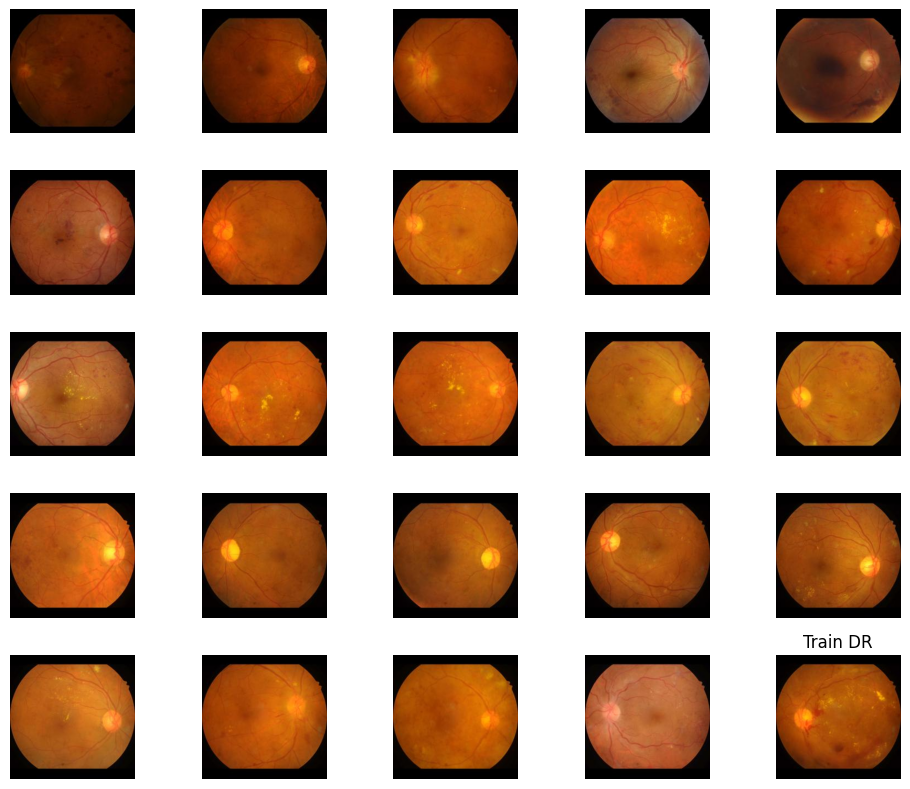

In [66]:
fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(testDR[i]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Montage Test non Dr

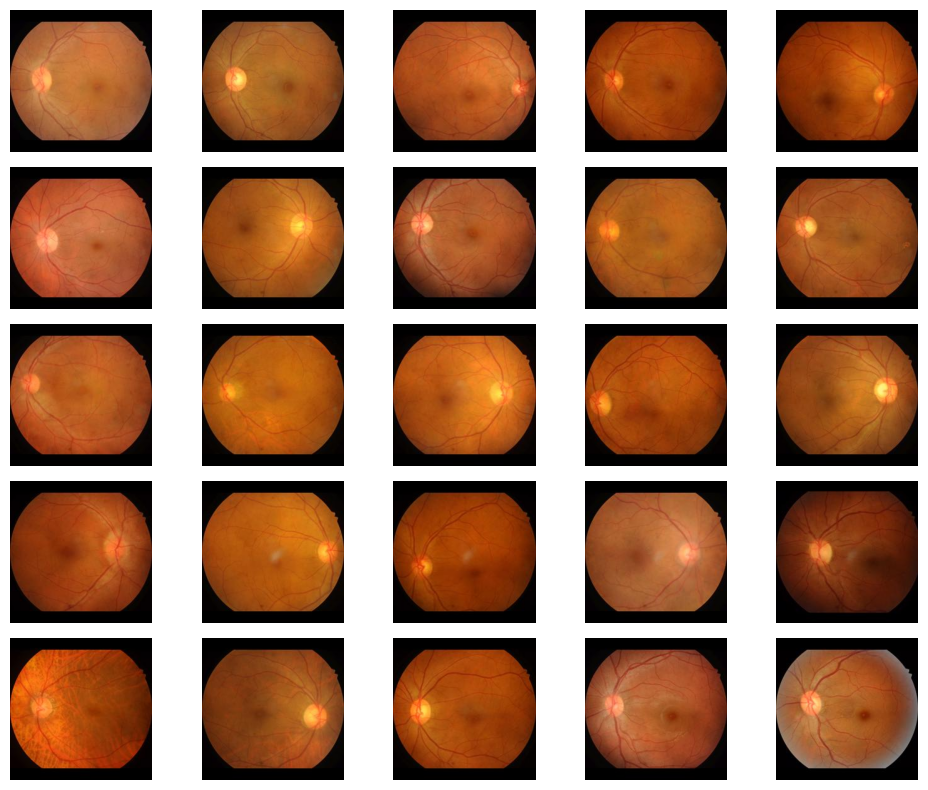

In [67]:
fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(testnonDR[i]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()